In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sm
from scipy import stats

import statsmodels as sm

from statsmodels.stats.weightstats import ttest_ind


# Exploratory Data Analysis (EDA)

In [71]:
# importing the csv dataset and printing out the first ten rows 
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [72]:
# printing out all information for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [73]:
# data over 1 year
df['date']= pd.to_datetime(df['date']) 
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [74]:
# There are 177 house that have been sold twice (or more)
id_len = len(df['id'].unique())
x = len(df) - id_len
x

177

In [75]:
# one of them has been sold  three times
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [76]:
# showcasing the house sold three times
unique_3_initial = df.loc[df['id'] == 795000620]
unique_3_initial

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [77]:
# created a new Dataframe with unique values and last price for the double houses.

df_unique = df.drop_duplicates(subset = 'id', keep = 'last')
# Showcasing the in the unique dataset and the only house sold three times, the last price has been left
unique_3 = df_unique.loc[df_unique['id'] == 795000620]
unique_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


In [78]:
# THIS WILL BE THE DATASET WE WILL BE WORKING ON 
df_unique

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [79]:
# Created a new DataFrame for houses sold twice. One of them (795000620) three times
houses_sold_twice = df[df.duplicated(['id'], keep= 'first')]
len(houses_sold_twice)

177

In [84]:
x = df['id'].isin(houses_sold_twice['id']) == 1
x.value_counts()


False    21244
True       353
Name: id, dtype: int64

In [85]:
# create new dataframe for houses sold once
df['sold_twice'] = df['id'].isin(houses_sold_twice['id']) == 1

# df['sold_twice'] = df['id'].map(lambda x: x.isin(houses_sold_twice['id']))

# df['sold_twice'] = [True if x in (houses_sold_twice['id']) else False for x in df['id']]


In [59]:
# Correlation map with heat map. Warmer colours show a positive correlation

df.drop(['id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.31,0.53,0.7,0.09,0.26,0.28,0.4,0.036,0.67,0.61,0.054,0.13,-0.053,0.31,0.022,0.59,0.083
bedrooms,0.31,1.0,0.51,0.58,0.032,0.18,-0.0024,0.079,0.026,0.36,0.48,0.16,0.018,-0.15,-0.01,0.13,0.39,0.031
bathrooms,0.53,0.51,1.0,0.76,0.088,0.5,0.067,0.19,-0.13,0.67,0.69,0.51,0.051,-0.2,0.024,0.22,0.57,0.088
sqft_living,0.7,0.58,0.76,1.0,0.17,0.35,0.11,0.28,-0.059,0.76,0.88,0.32,0.056,-0.2,0.052,0.24,0.76,0.18
sqft_lot,0.09,0.032,0.088,0.17,1.0,-0.0048,0.023,0.075,-0.0088,0.11,0.18,0.053,0.0045,-0.13,-0.086,0.23,0.14,0.72
floors,0.26,0.18,0.5,0.35,-0.0048,1.0,0.022,0.028,-0.26,0.46,0.52,0.49,0.0035,-0.06,0.049,0.13,0.28,-0.011
waterfront,0.28,-0.0024,0.067,0.11,0.023,0.022,1.0,0.41,0.018,0.087,0.075,-0.026,0.087,0.031,-0.013,-0.04,0.089,0.032
view,0.4,0.079,0.19,0.28,0.075,0.028,0.41,1.0,0.046,0.25,0.17,-0.055,0.1,0.085,0.0061,-0.078,0.28,0.073
condition,0.036,0.026,-0.13,-0.059,-0.0088,-0.26,0.018,0.046,1.0,-0.15,-0.16,-0.36,-0.062,0.0029,-0.015,-0.11,-0.093,-0.0031
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.087,0.25,-0.15,1.0,0.76,0.45,0.017,-0.19,0.11,0.2,0.71,0.12


# Is there significant evidence that renovating the house increases the price?

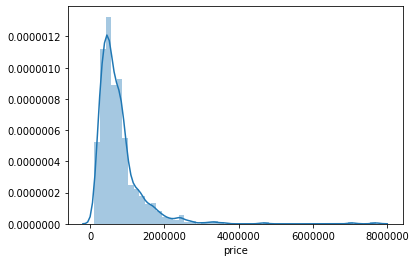

In [60]:
# finding out how many houses were renovated 
df_renovated = df_unique.loc[df['yr_renovated'] > 0]
mean_ren = df_renovated['price'].mean()
std_ren = df_renovated['price'].std()
len(df_renovated)
graph_renovated = sns.distplot(df_renovated['price'])

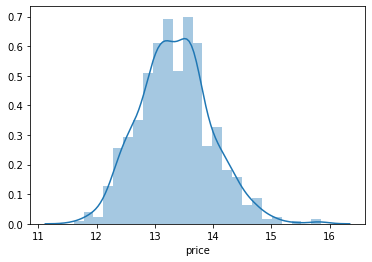

In [61]:
# tranformi
helpful_log_renovated = np.log(df_renovated['price'])
sns.distplot(helpful_log_renovated)

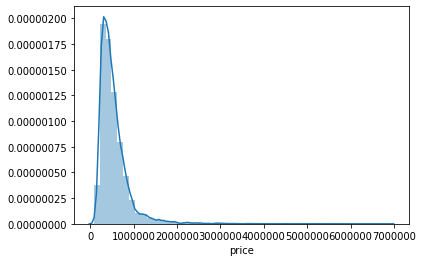

In [62]:
# creating DataFrame for houses that didn't go through renovation
df_non_renovated = df_unique.loc[(df['yr_renovated'] == 0)| (df['yr_renovated'].isnull())]
mean_non_renovated = df_non_renovated['price'].mean()
std_non_renovated = df_non_renovated['price'].std()
len(df_non_renovated)
graph_non_renovated = sns.distplot(df_non_renovated['price'])

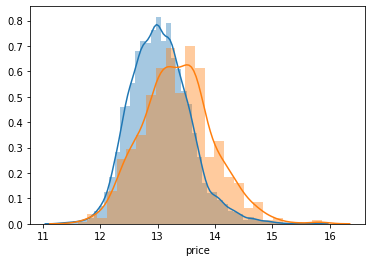

In [86]:
# transforming price into log for not renovated houses
helpful_log_non = np.log(df_non_renovated['price'])

sns.distplot(helpful_log_non)
sns.distplot(helpful_log_renovated)
plt.show()

In [68]:
# H0 renovation has no effect whatsoever on final price
mu = np.log(df_unique['price']).mean()

one_sample = stats.ttest_1samp(helpful_log_renovated, mu)

print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 12.998 and the p-value is 0.000.


In [ ]:
# There seems to be